In [1]:
from coffea.nanoevents import NanoEventsFactory, NanoAODSchema, BaseSchema,PFNanoAODSchema
import awkward as ak
import uproot
from matplotlib import pyplot as plt

# print coffea version
import coffea
print(coffea.__version__)

print(ak.__version__)


0.7.22
1.10.3


In [2]:
filename = "root://xrootd-cms.infn.it//store/mc/Run3Summer22NanoAODv12/QCD_PT-15_TuneCP5_Flat2018_13p6TeV_pythia8/NANOAODSIM/JMENano12p5_132X_mcRun3_2022_realistic_v3-v2/70000/1a3d12b4-15b7-415c-a25a-df0e81f71648.root"
# filename = "root://storage01.lcg.cscs.ch:1096//pnfs/lcg.cscs.ch/cms/trivcat//store/mc/Run3Summer22EENanoAODv12/GluGlutoHHto4B_kl-1p00_kt-1p00_c2-0p00_TuneCP5_13p6TeV_powheg-pythia8/NANOAODSIM/Poisson60KeepRAW_130X_mcRun3_2022_realistic_postEE_v6-v2/50000/fc603037-ef65-4bbf-9cef-934ecec40bbe.root"
# filename = "/pnfs/psi.ch/cms/trivcat/store/user/mmalucch/hh4b_12.root"
print("Opening file:", filename)
events = NanoEventsFactory.from_root(
    filename, schemaclass=NanoAODSchema,
).events()
print(len(events))
# open file with uproot
# file = uproot.open(filename)
# # get the tree
# events = file['Events']
# print("Events read:", len(events))
# print(events.keys())
# print(events, type(events))

# convert the tree to a awkward array
# events = events.arrays(library="ak", how="zip")
# print(events, type(events))

Opening file: root://xrootd-cms.infn.it//store/mc/Run3Summer22NanoAODv12/QCD_PT-15_TuneCP5_Flat2018_13p6TeV_pythia8/NANOAODSIM/JMENano12p5_132X_mcRun3_2022_realistic_v3-v2/70000/1a3d12b4-15b7-415c-a25a-df0e81f71648.root
84101


In [3]:
neutrinos=events.GenPart[(abs(events.GenPart.pdgId)==12) | (abs(events.GenPart.pdgId)==14) |(abs(events.GenPart.pdgId)==16)]
print(neutrinos)
print(neutrinos.genPartIdxMother)
# print the neutrinos mother
neutrino_mother=events.GenPart[neutrinos.genPartIdxMother].pdgId
print(neutrino_mother)


[[], [], [], [], [], [], [], ... [GenParticle], [], [], [], [], [GenParticle]]
[[], [], [], [], [], [], [], [30], [], ... [47, 49], [38], [], [], [], [], [76]]
[[], [], [], [], [], [], [], [411], ... [411, 421], [-421], [], [], [], [], [411]]


In [4]:
# remove empty arrays
pi_neutrino=(neutrinos[neutrino_mother==411])

In [5]:
# print only the arrays with at least one element
print(pi_neutrino[ak.num(pi_neutrino)>0])
print(neutrinos[ak.num(neutrinos)>0])
print(neutrino_mother[ak.num(neutrino_mother)>0])

non_meson_neutrinos=neutrino_mother
print(len(non_meson_neutrinos[ak.num(non_meson_neutrinos)>0]))
non_meson_neutrinos=neutrino_mother[(abs(neutrino_mother)>400)]
print(len(non_meson_neutrinos[ak.num(non_meson_neutrinos)>0]))
non_meson_neutrinos=neutrino_mother[(abs(neutrino_mother)>500)]
print(len(non_meson_neutrinos[ak.num(non_meson_neutrinos)>0]))
non_meson_neutrinos=neutrino_mother[(abs(neutrino_mother)<100)]
print(len(non_meson_neutrinos[ak.num(non_meson_neutrinos)>0]))

non_meson_neutrinos=neutrinos[(abs(neutrino_mother)<100) & (abs(neutrino_mother)>0)]
print(len(non_meson_neutrinos[ak.num(non_meson_neutrinos)>0].pdgId))

[[GenParticle], [GenParticle], [GenParticle, ... [GenParticle], [GenParticle]]
[[GenParticle], [GenParticle, GenParticle, ... [GenParticle], [GenParticle]]
[[411], [-511, 15, -411], [-411], [411], ... [-411], [411, 421], [-421], [411]]
21346
21341
4912
1579
1579


(array([0., 0., 0., ..., 0., 0., 0.]),
 array([-6000., -5999., -5998., ...,  5998.,  5999.,  6000.]),
 <BarContainer object of 12000 artists>)

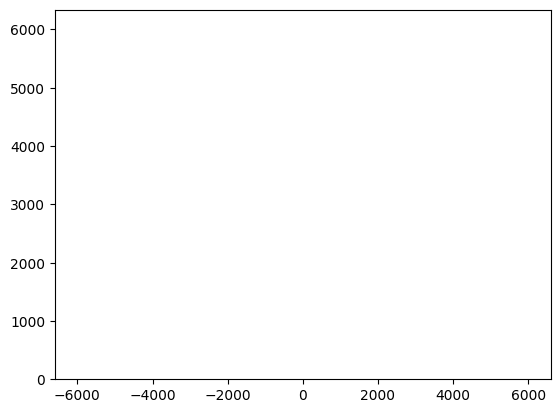

In [6]:
n_mother_flatten=ak.flatten(neutrino_mother)
plt.hist(n_mother_flatten, bins=12000, range=(-6000,6000))